In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
#load the data
#load data
df = pd.read_csv("BTC-USD.csv")
#Set data as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [16]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [17]:
future_days = 5

In [18]:
#Create new column containing future price
df[str(future_days)+'_Day_price_Forecast'] = df[['Close']].shift(-future_days)
#Show data
df[['Close', str(future_days)+'_Day_price_Forecast']]

<ipython-input-18-f814190ba5c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(future_days)+'_Day_price_Forecast'] = df[['Close']].shift(-future_days)


,Close,5_Day_price_Forecast
2014-09-17,457.334015,402.152008
2014-09-18,424.440002,435.790985
2014-09-19,394.795990,423.204987
2014-09-20,408.903992,411.574005
2014-09-21,398.821014,404.424988
...,...,...
2021-12-06,50582.625000,NaN
2021-12-07,50700.085938,NaN
2021-12-08,50504.796875,NaN
2021-12-09,47672.121094,NaN


In [19]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [53598.246094]
 [49200.703125]
 [49368.847656]]


In [20]:
y = np.array(df[str(future_days)+'_Day_price_Forecast'])
y = y[:-future_days]
print(y)

[  402.152008   435.790985   423.204987 ... 50504.796875 47672.121094
 48460.320313]


In [21]:
#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=True)

In [22]:
from sklearn.svm import SVR 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [23]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.6673277561563861


In [24]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 8324.472714    8822.82343043  6829.96315191 18298.89710052
  3740.28032048  9562.25751311   969.94704317   246.94156974
 27960.49420185  7354.24329958   270.73435089 11712.19829947
  8642.78151888 20760.72776807  9310.84199357  3909.01541391
  7139.45425099   431.6418627   1211.95281037  4142.77539036
 19476.1222234   5914.75642509   455.19796229  4641.57238315
   281.76486081   823.68561741   230.6980344    255.87198618
  5659.1352329  21437.13593496 10941.0967031    425.66332319
  1245.73392103   563.87971418  9266.89334035   456.4424725
   918.6788012    230.42756479  9260.58702839  7465.32398983
  5862.71165938   458.97069348  7411.06200981  3804.59533821
  7183.78673805  9577.95783985  2806.31105716   228.75404218
  3904.16781954 29353.23552762 20520.4287389    683.30029315
   234.50954191 11754.11949556   791.51421797   235.35429593
 10334.37417538 15981.46138852   248.71573992 10528.0213101
 21011.3390085    261.46268446  3847.53868322  9717.61715176
  5617.97380322   457.6952

In [25]:
print(y_test)

[ 8078.203125  7355.879883  6972.371582 16408.199219  3673.836182
  9269.987305   998.325012   241.112    57248.457031  7343.895508
   210.494995  9664.730469  8909.819336 37536.632813  8716.790039
  4035.296387  7302.089355   375.197998  1120.540039  1724.23999
 29374.152344  5238.438477   454.93399   4100.52002    225.619003
   899.072998   243.944      237.292999  5279.348145 56048.9375
 10787.618164   409.548004  1316.47998    577.469971  8406.515625
   439.322998   892.687012   296.378998  9185.817383  8166.554199
  4376.529785   442.675995  7260.060059  3252.839111  7193.25
 10214.379883  2810.120117   245.022003  4076.632568 57539.945313
 47047.003906   673.336975   270.385986  9693.802734   790.828979
   266.376007 10131.055664 16936.800781   274.901001 10974.905273
 63503.457031   238.167999  1808.910034  9663.181641  5768.289551
   426.619995   414.065002  2518.439941   411.574005   310.737
   285.337006  6865.493164   247.272003  9700.759766   972.778992
 10623.330078  1187.

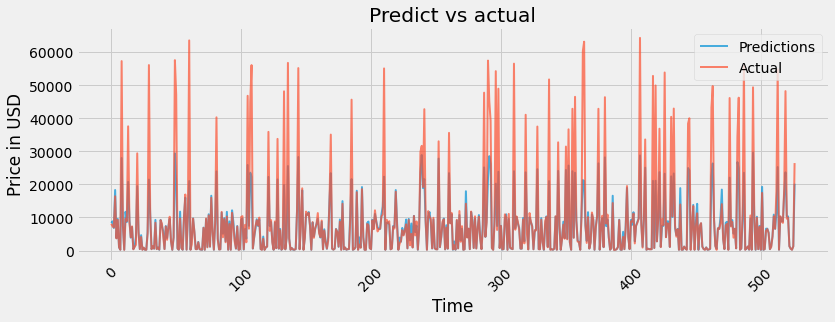

In [26]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Predictions', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Predict vs actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()